# Capstone Project - Predicting House Prices in KING COUNTY

# 1. Import Libraries and load dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the PROCESSED HOUSE Dataset
house_feature_df  = pd.read_csv("house_feature_df.csv")

## Geo location analysis using latitudes and longitudines to identify high price locations

In [3]:
#Import GeoPandas package to plot the latitudes and longitudines on a map
import geopandas as gpd
#Import Point and Polygon modules from the package Shapely
from shapely.geometry import Point, Polygon

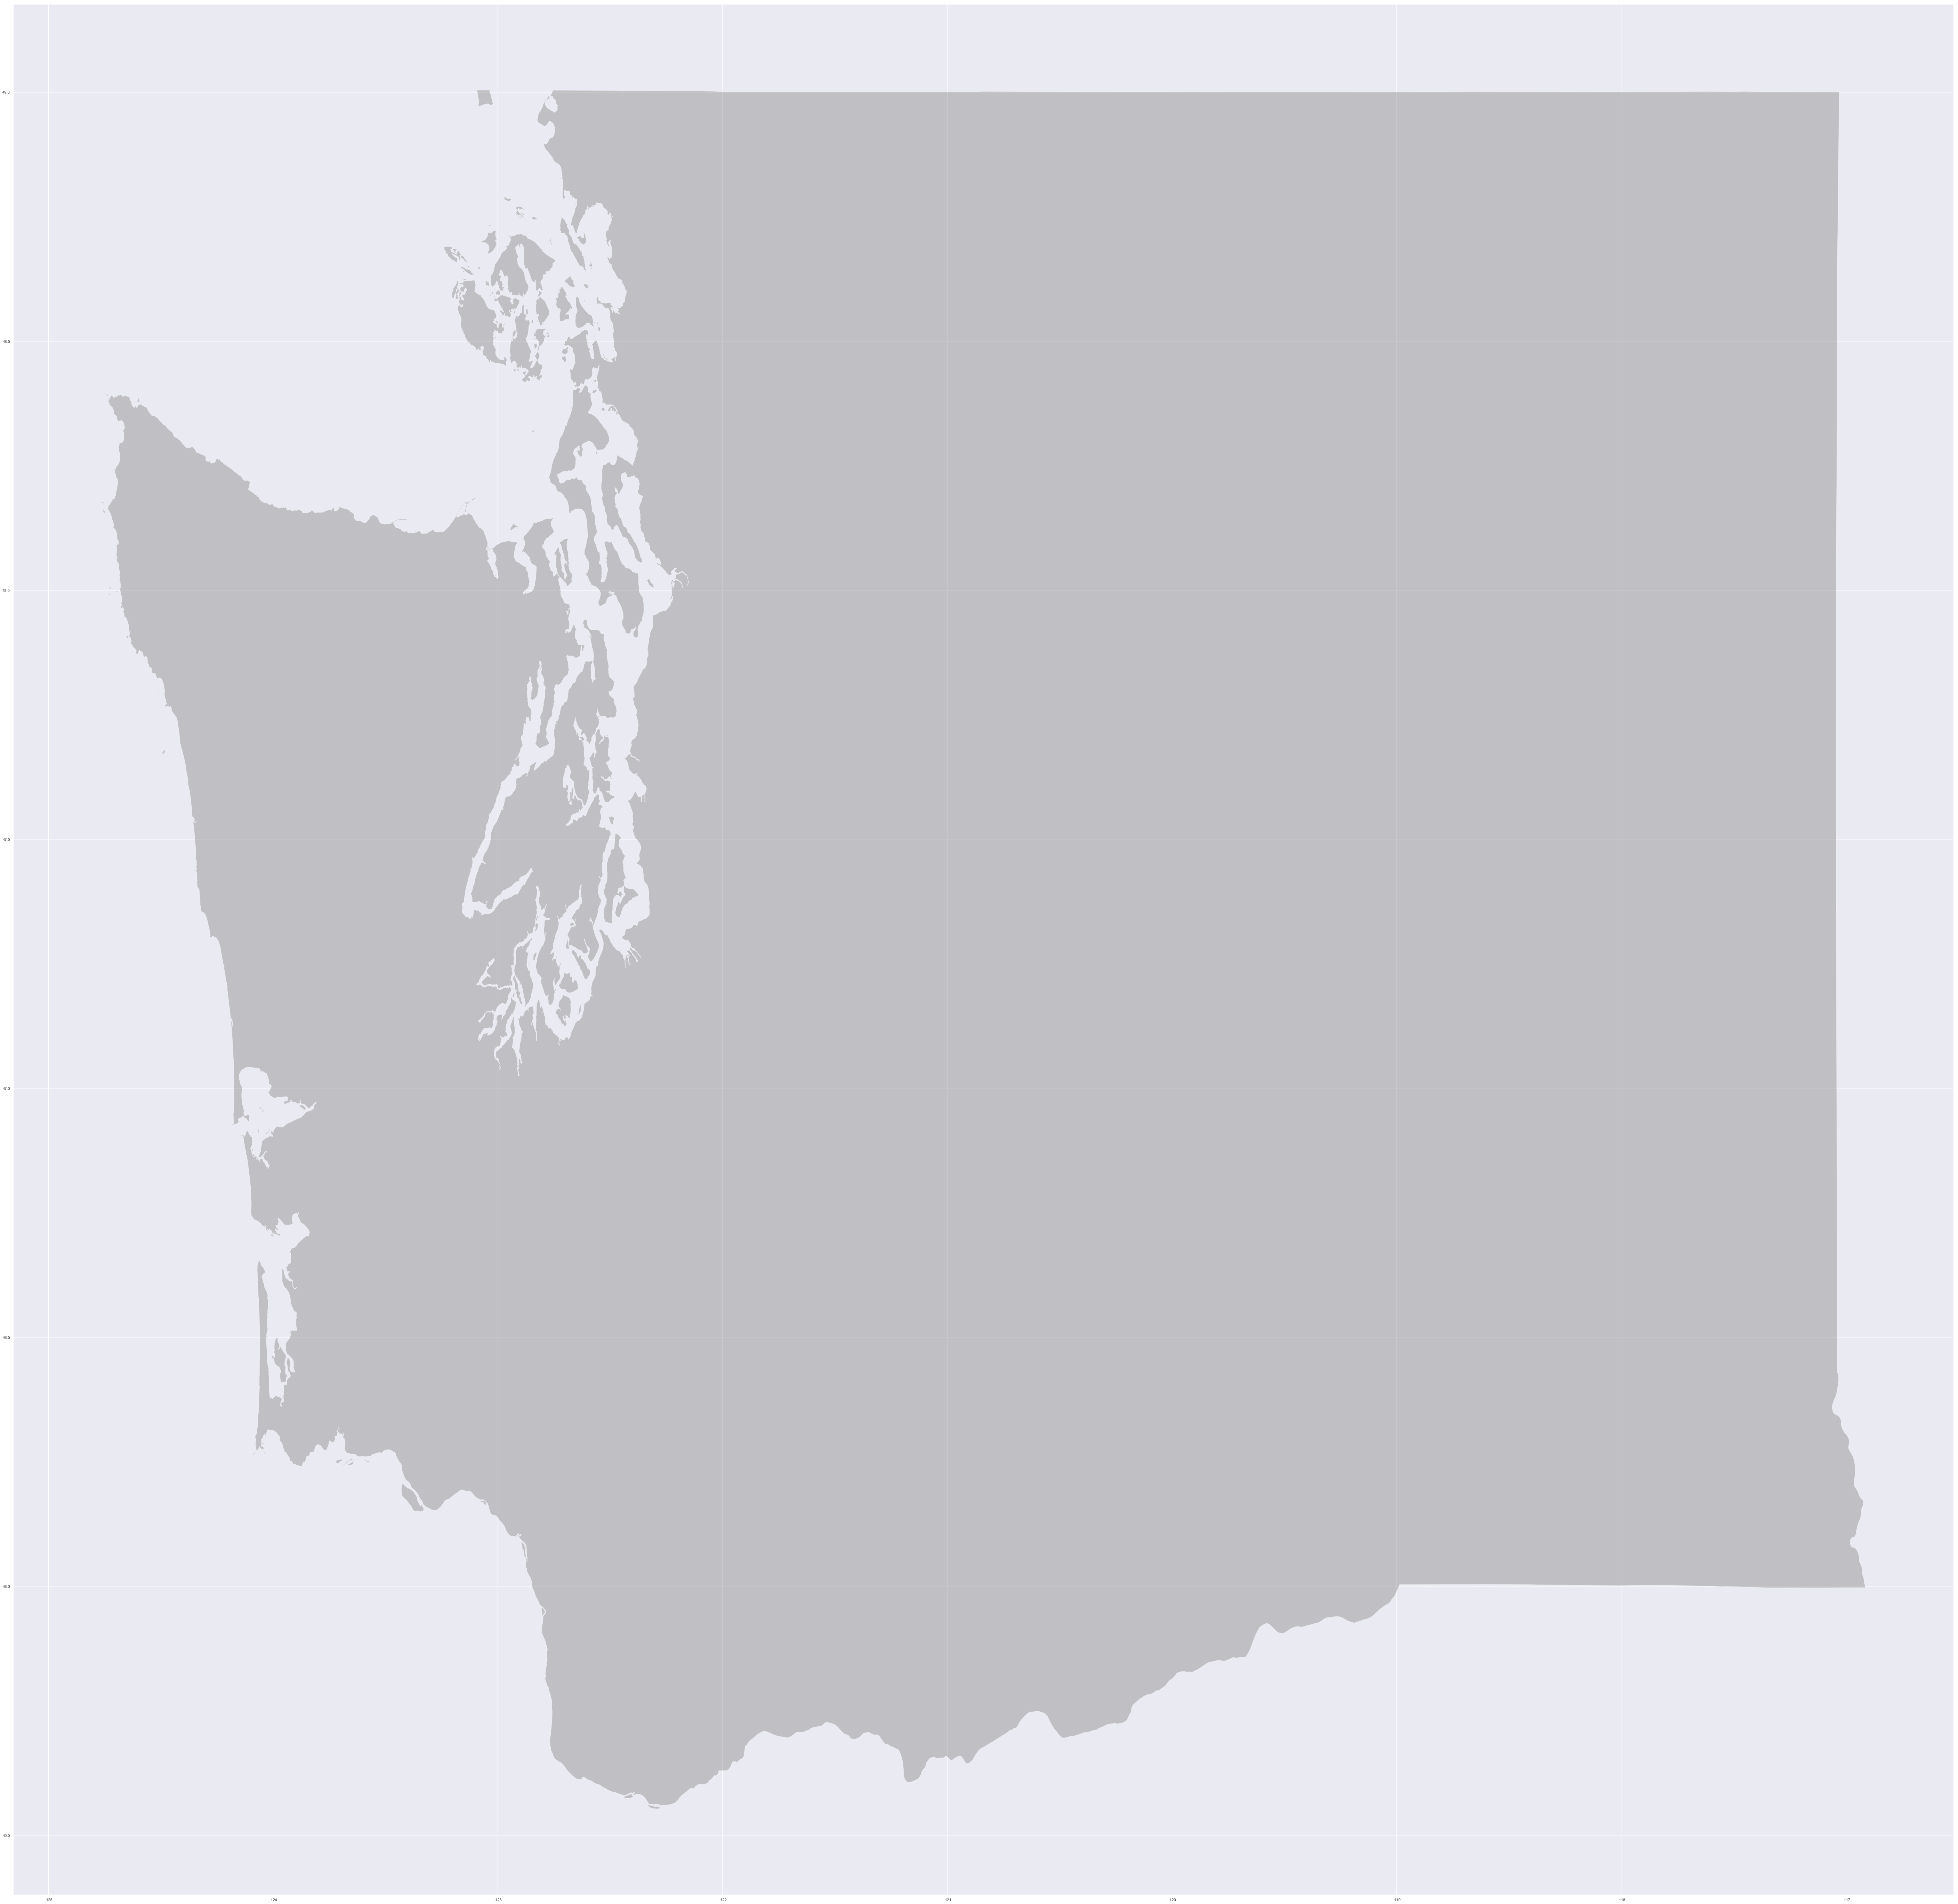

In [4]:
#Read the shape file of KingCounty village of  Washington, United States of America
KingCounty_Washington_map = gpd.read_file("USA_adm1_select2.shp")
#Plot the map of King County of Washington               
fig, ax = plt.subplots(figsize = (100,100))
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.4)

In [5]:
#Creates the point from the latitude and longitude of the located house.
#Point is essentially a single object that describes the longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(house_feature_df.long, house_feature_df.lat)]

In [6]:
#Convert the dataframe house_df into the Geo panda data frame house_df_new
#crs = {'init': 'epsg:4326'}
#house_feature_df_Geo = gpd.GeoDataFrame(house_feature_df, crs=crs, geometry=geometry)
house_feature_df_Geo = gpd.GeoDataFrame(house_feature_df,  geometry=geometry) 

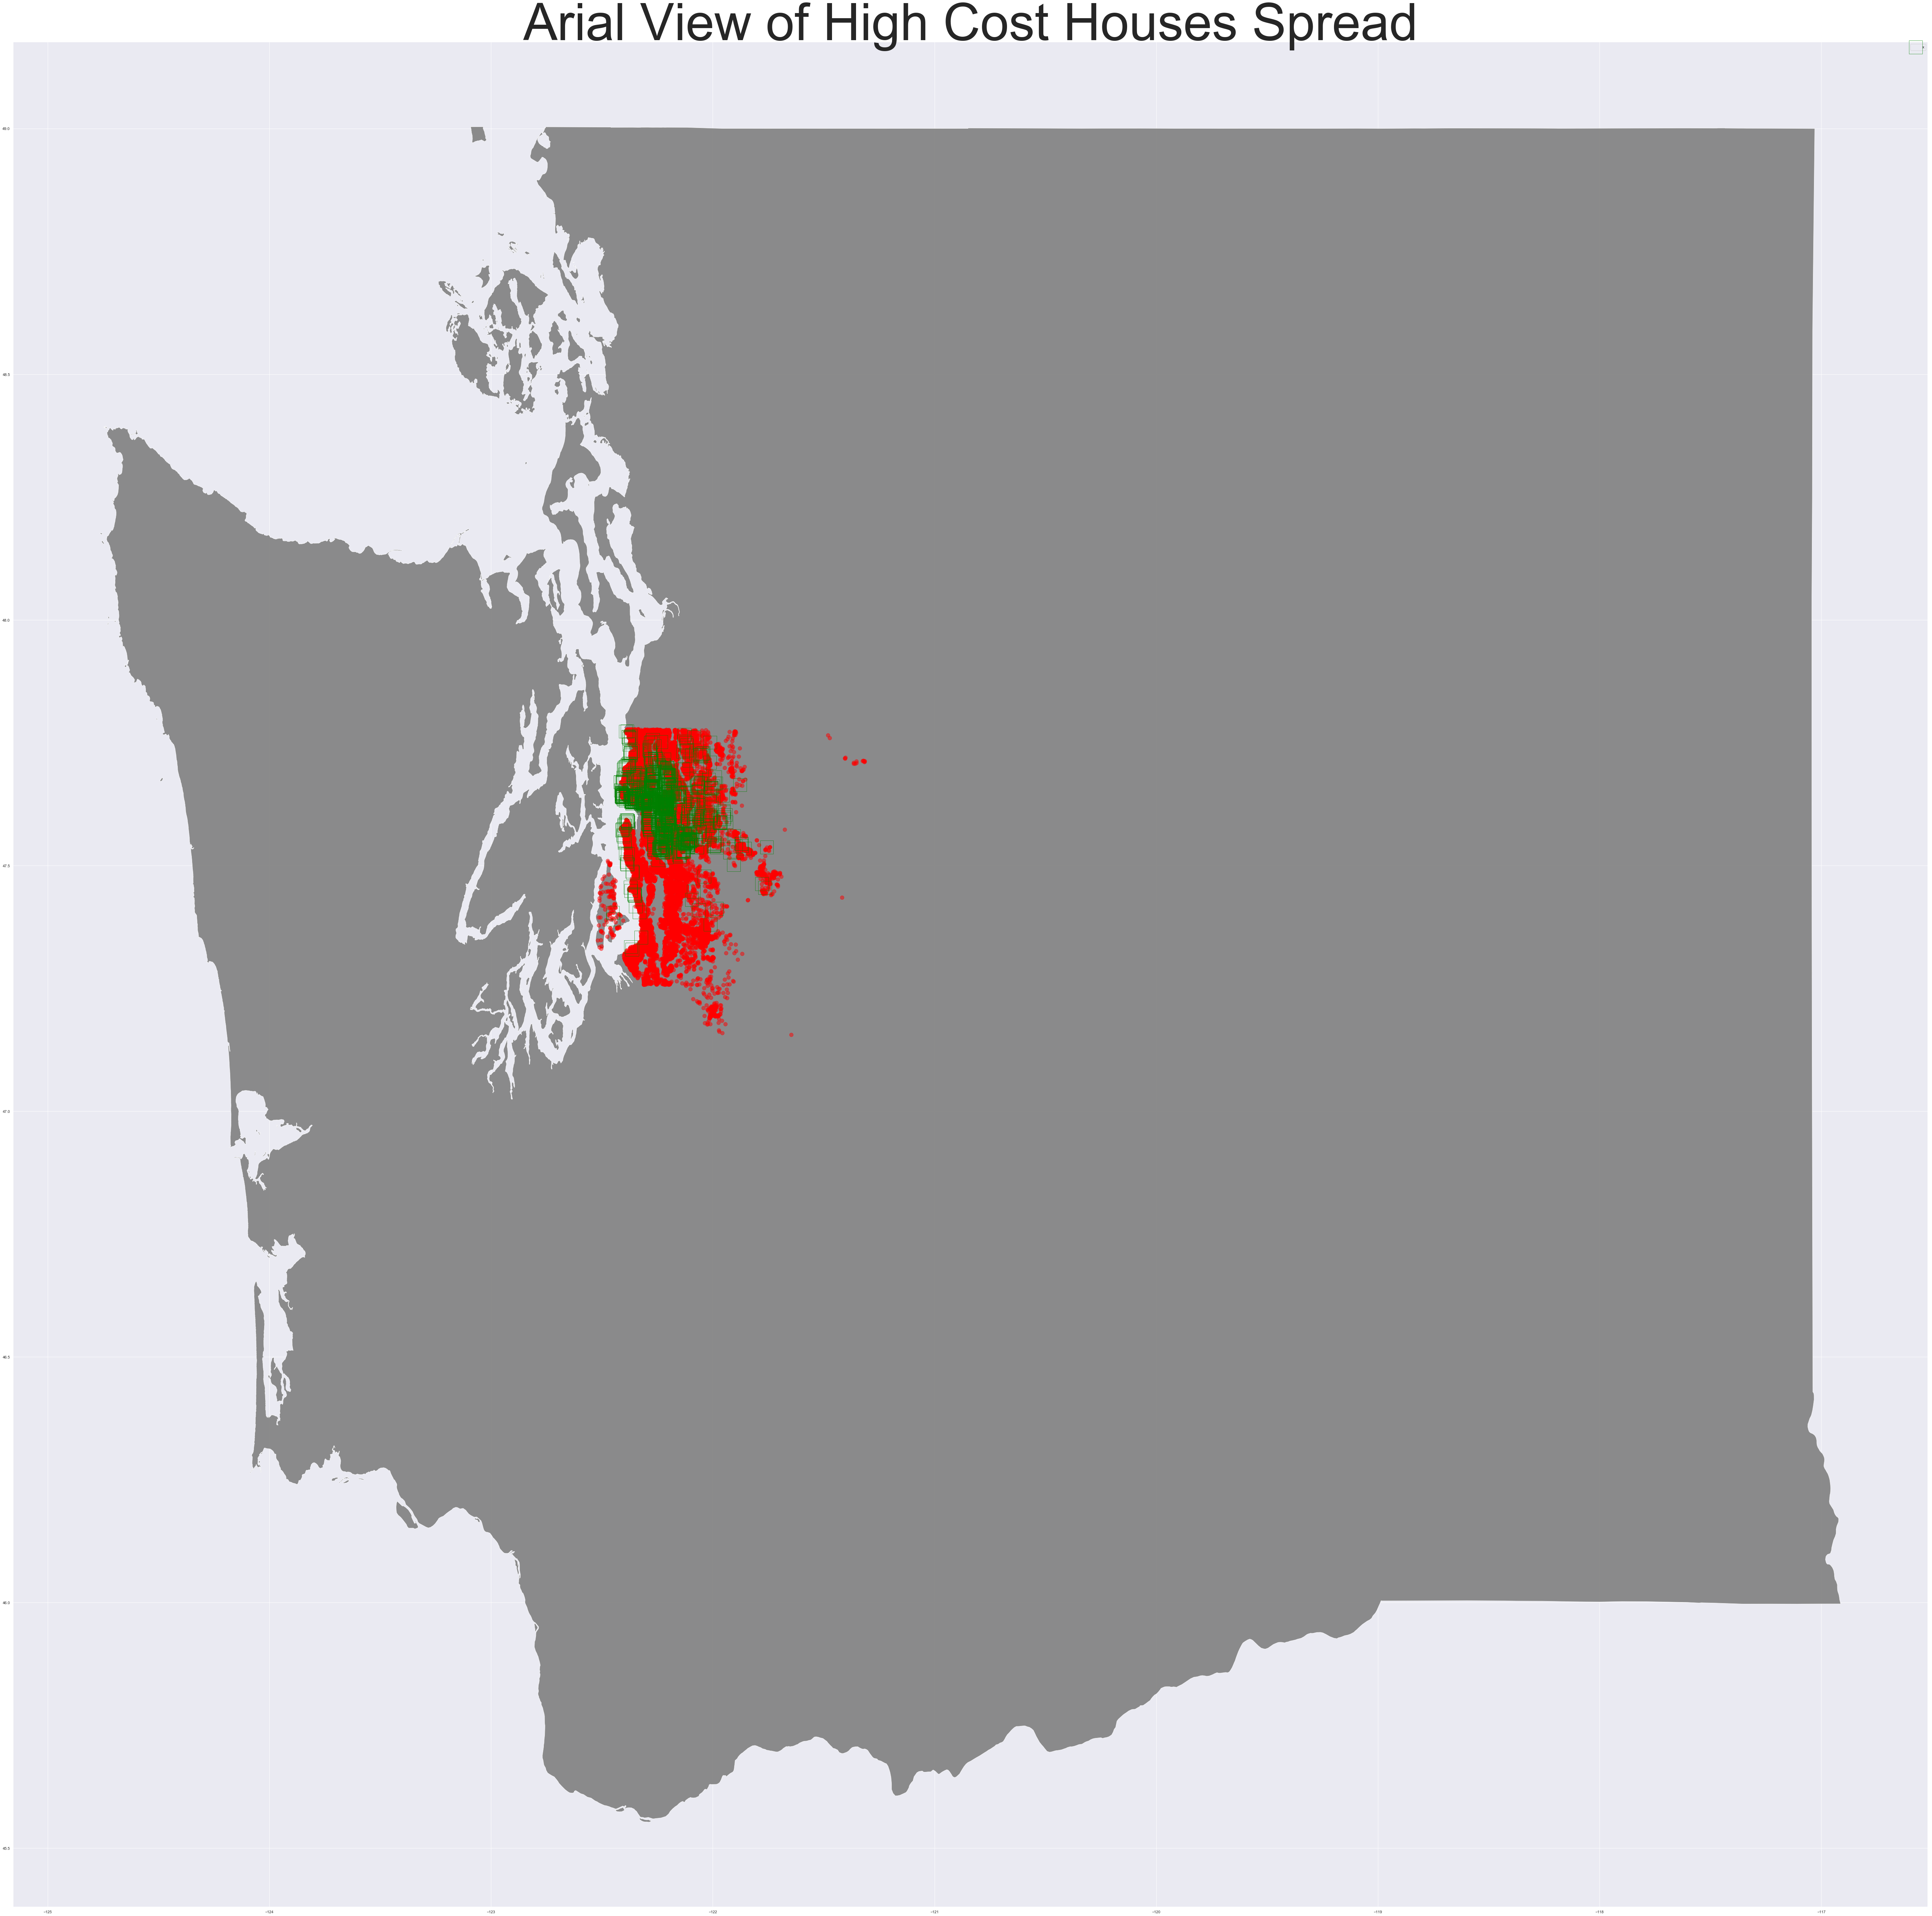

In [7]:
#Plot the houses whose price identified as outliers (> 1128000)  

fig, ax = plt.subplots(figsize = (100,100))
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.9)
house_feature_df_Geo.geometry.plot(marker='.', color = 'Red', ax = ax,alpha=.5, markersize = 500)
house_feature_df_Geo[house_feature_df_Geo['price']>1128000].geometry.plot(marker="s",color = 'green', ax = ax, label = 'x',facecolors="None", alpha=.7, markersize = 1500)
plt.title('Arial View of High Cost Houses Spread',fontsize=150) 
plt.legend()

# Get Sample address of few High cost houses

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="")

In [9]:
location = geolocator.reverse("47.5306, -122.134")
print(location.address)

15415, Southeast 80th Street, Newcastle, King County, Washington, 98059, USA


In [10]:
location = geolocator.reverse("47.6425, -122.406")
print(location.address)

2558, 38th Avenue West, Magnolia, Seattle, King County, Washington, 98199, USA


### Create new column representing Premium house if the cost of house (> 1128000) and store the outfile

In [11]:
house_feature_df['Premium_House']   = ''
rec_count = house_feature_df.shape[0]

for i in range(rec_count):
    if  (house_feature_df['price'][i] >= 1128000):
        house_feature_df['Premium_House'][i] = 1
    else:
        house_feature_df['Premium_House'][i] = 0

In [12]:
house_feature_df.head(1)

Unnamed: 0  yr_built  yr_renovated  house_age  age_after_renovtion  \
0           0      1956             0         58                    0   

   room_bed  room_bath  living_measure  lot_measure  ceil  ...  zipcode  \
0         4       3.25            3020        13457   1.0  ...    98133   

       lat     long  living_measure15  lot_measure15  furnished  total_area  \
0  47.7174 -122.336              2120           7553          1       16477   

    price                  geometry  Premium_House  
0  808100  POINT (-122.336 47.7174)              0  

[1 rows x 26 columns]

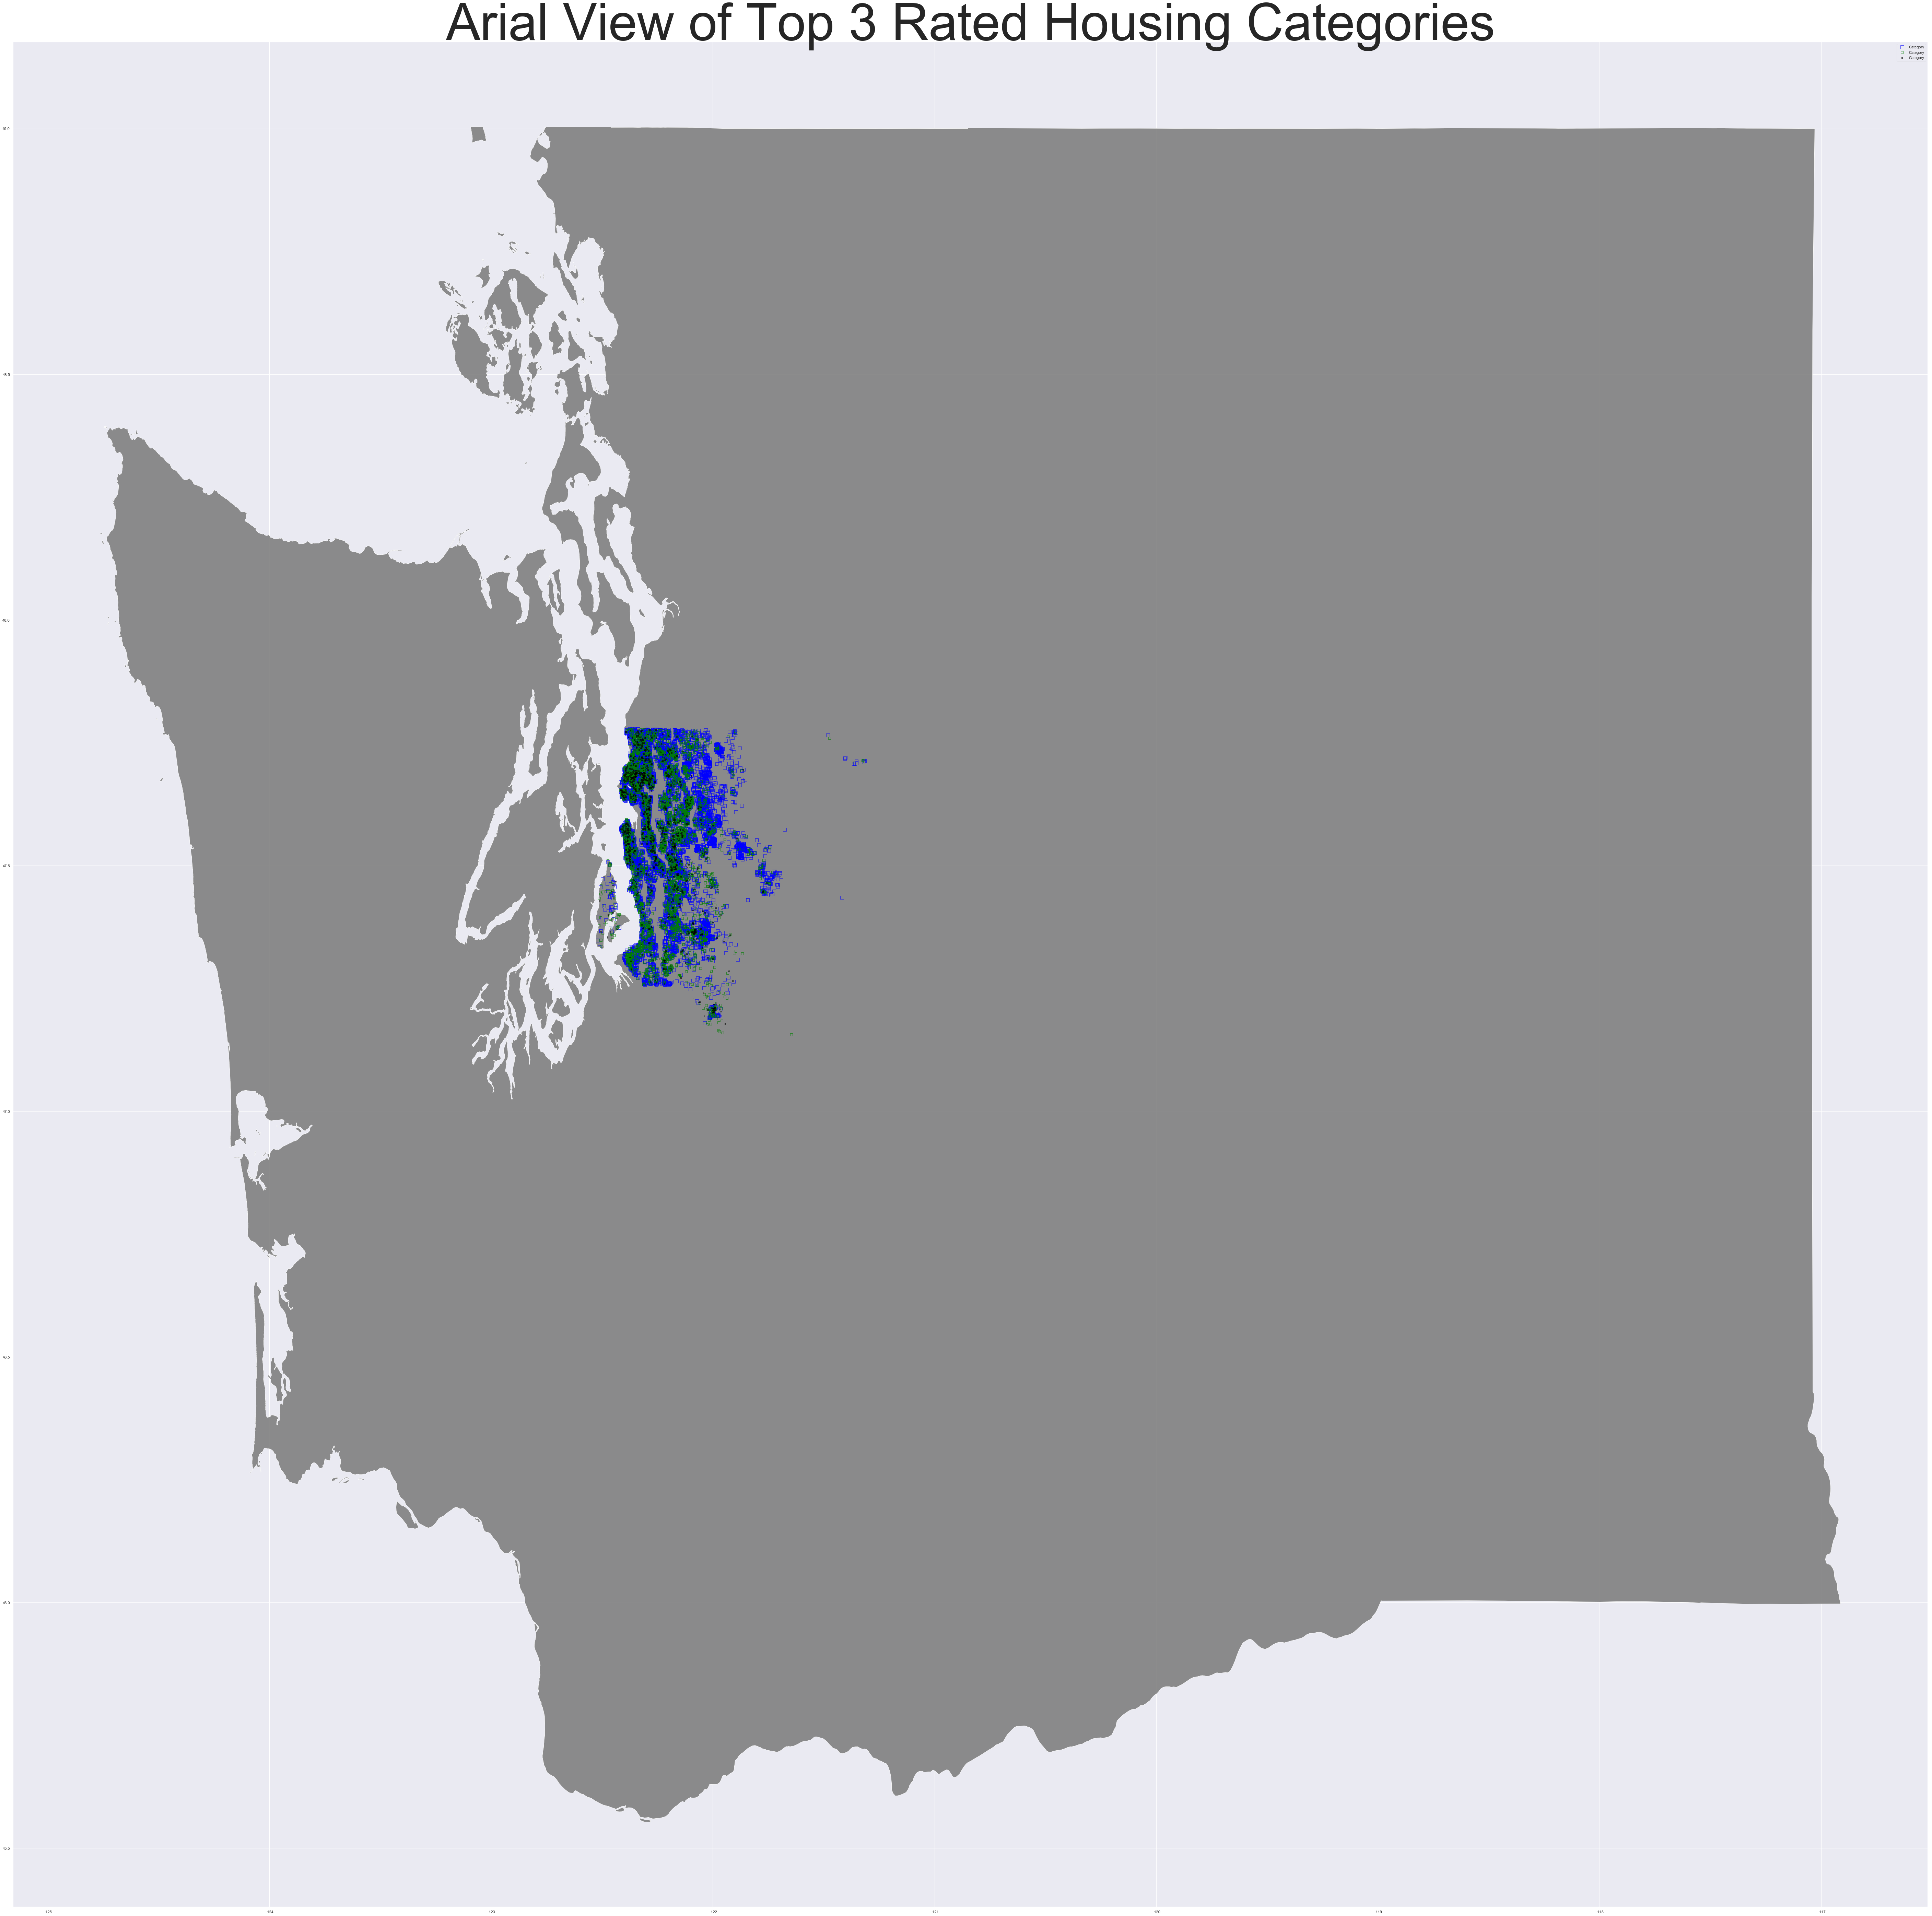

In [13]:
#Plot Top 3 Rated houses (Condition = 1, 2, 3)   

fig, ax = plt.subplots(figsize = (100,100))
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.9)
house_feature_df_Geo.geometry.plot(marker='.', color = 'None', ax = ax,alpha=.5, markersize = 500)
house_feature_df_Geo[house_feature_df_Geo['condition'] == 3].geometry.plot(marker="s",color = 'blue', ax = ax, label = 'Category',facecolors="None", alpha=.7, markersize = 100)
house_feature_df_Geo[house_feature_df_Geo['condition'] == 4].geometry.plot(marker="s",color = 'green', ax = ax, label = 'Category',facecolors="None", alpha=.7, markersize = 50)
house_feature_df_Geo[house_feature_df_Geo['condition'] == 5].geometry.plot(marker="s",color = 'black', ax = ax, label = 'Category',facecolors="None", alpha=.7, markersize = 10)
plt.title('Arial View of Top 3 Rated Housing Categories',fontsize=150)
plt.legend()

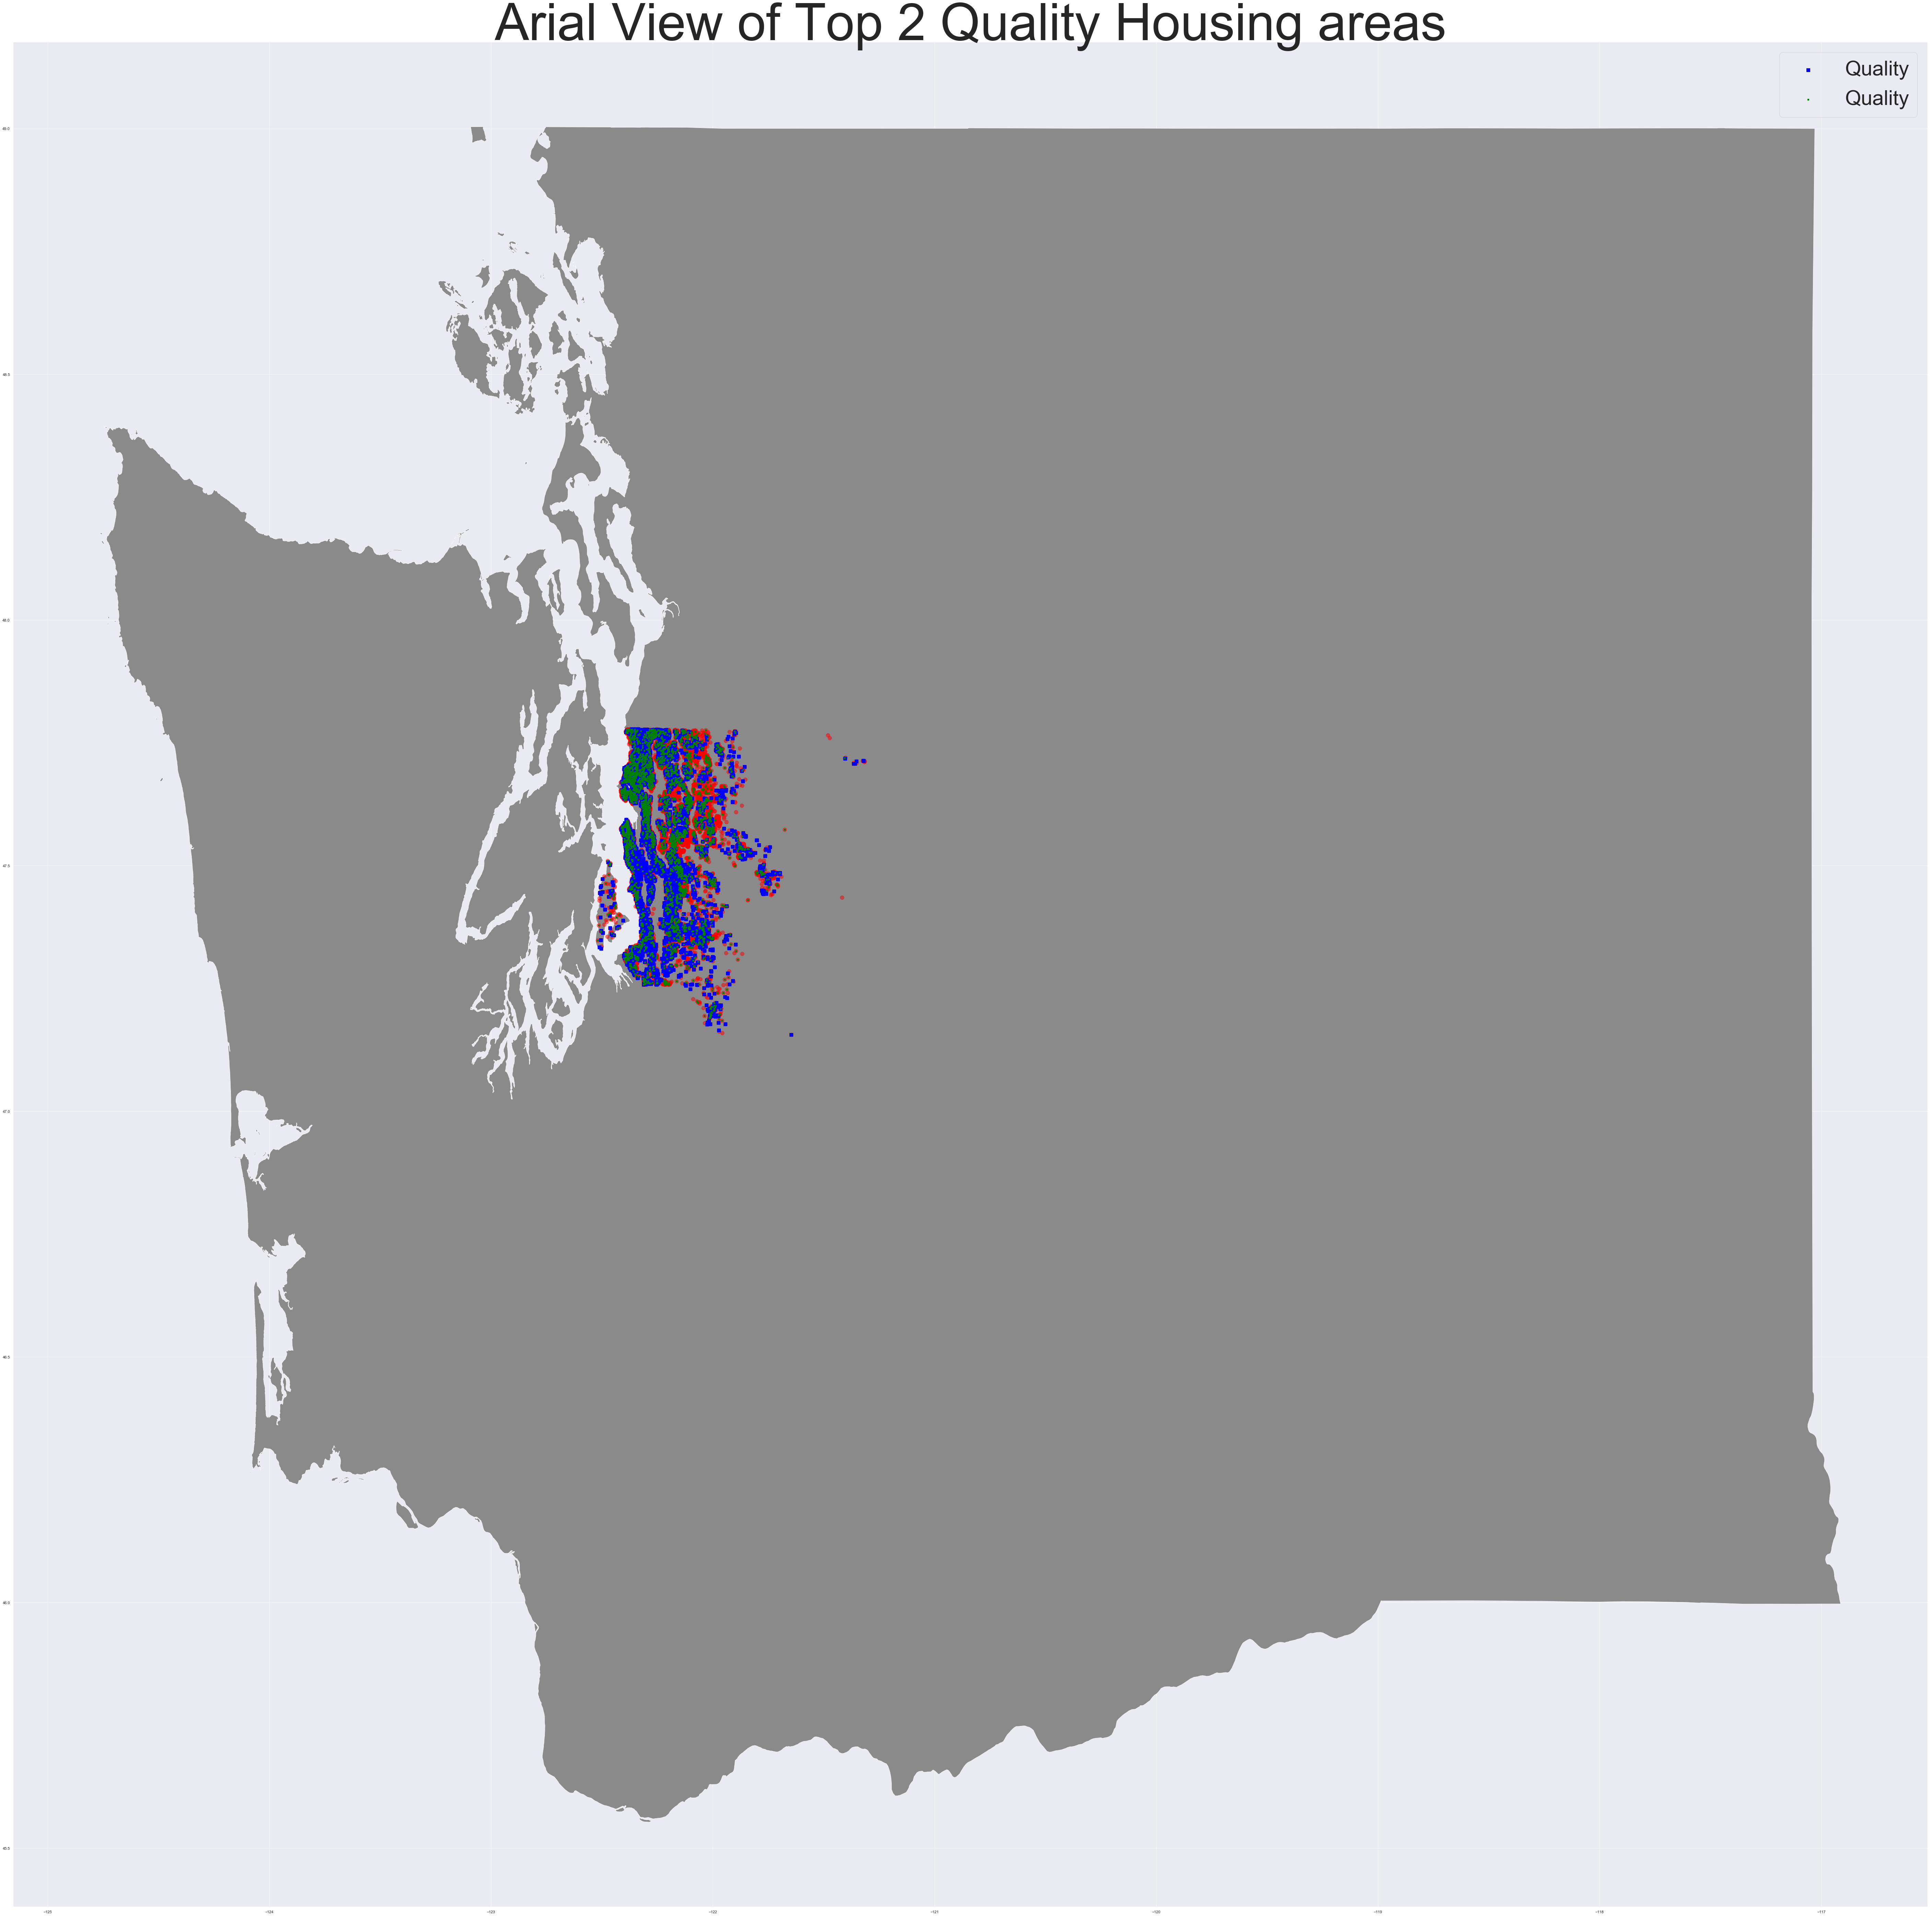

In [14]:
#Plot Top 2 Quality houses spread (Quality = 7, 8)    

fig, ax = plt.subplots(figsize = (100,100))
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.9)
house_feature_df_Geo.geometry.plot(marker='.', color = 'Red', ax = ax,alpha=.5, markersize = 500)
house_feature_df_Geo[house_feature_df_Geo['quality'] == 7].geometry.plot(marker="s",color = 'blue', ax = ax, label = 'Quality',facecolors="blue", alpha=1, markersize = 100)
house_feature_df_Geo[house_feature_df_Geo['quality'] == 8].geometry.plot(marker="s",color = 'green', ax = ax, label = 'Quality',facecolors="green", alpha=1, markersize = 10)
plt.title('Arial View of Top 2 Quality Housing areas',fontsize=150)
plt.legend(fontsize=60)

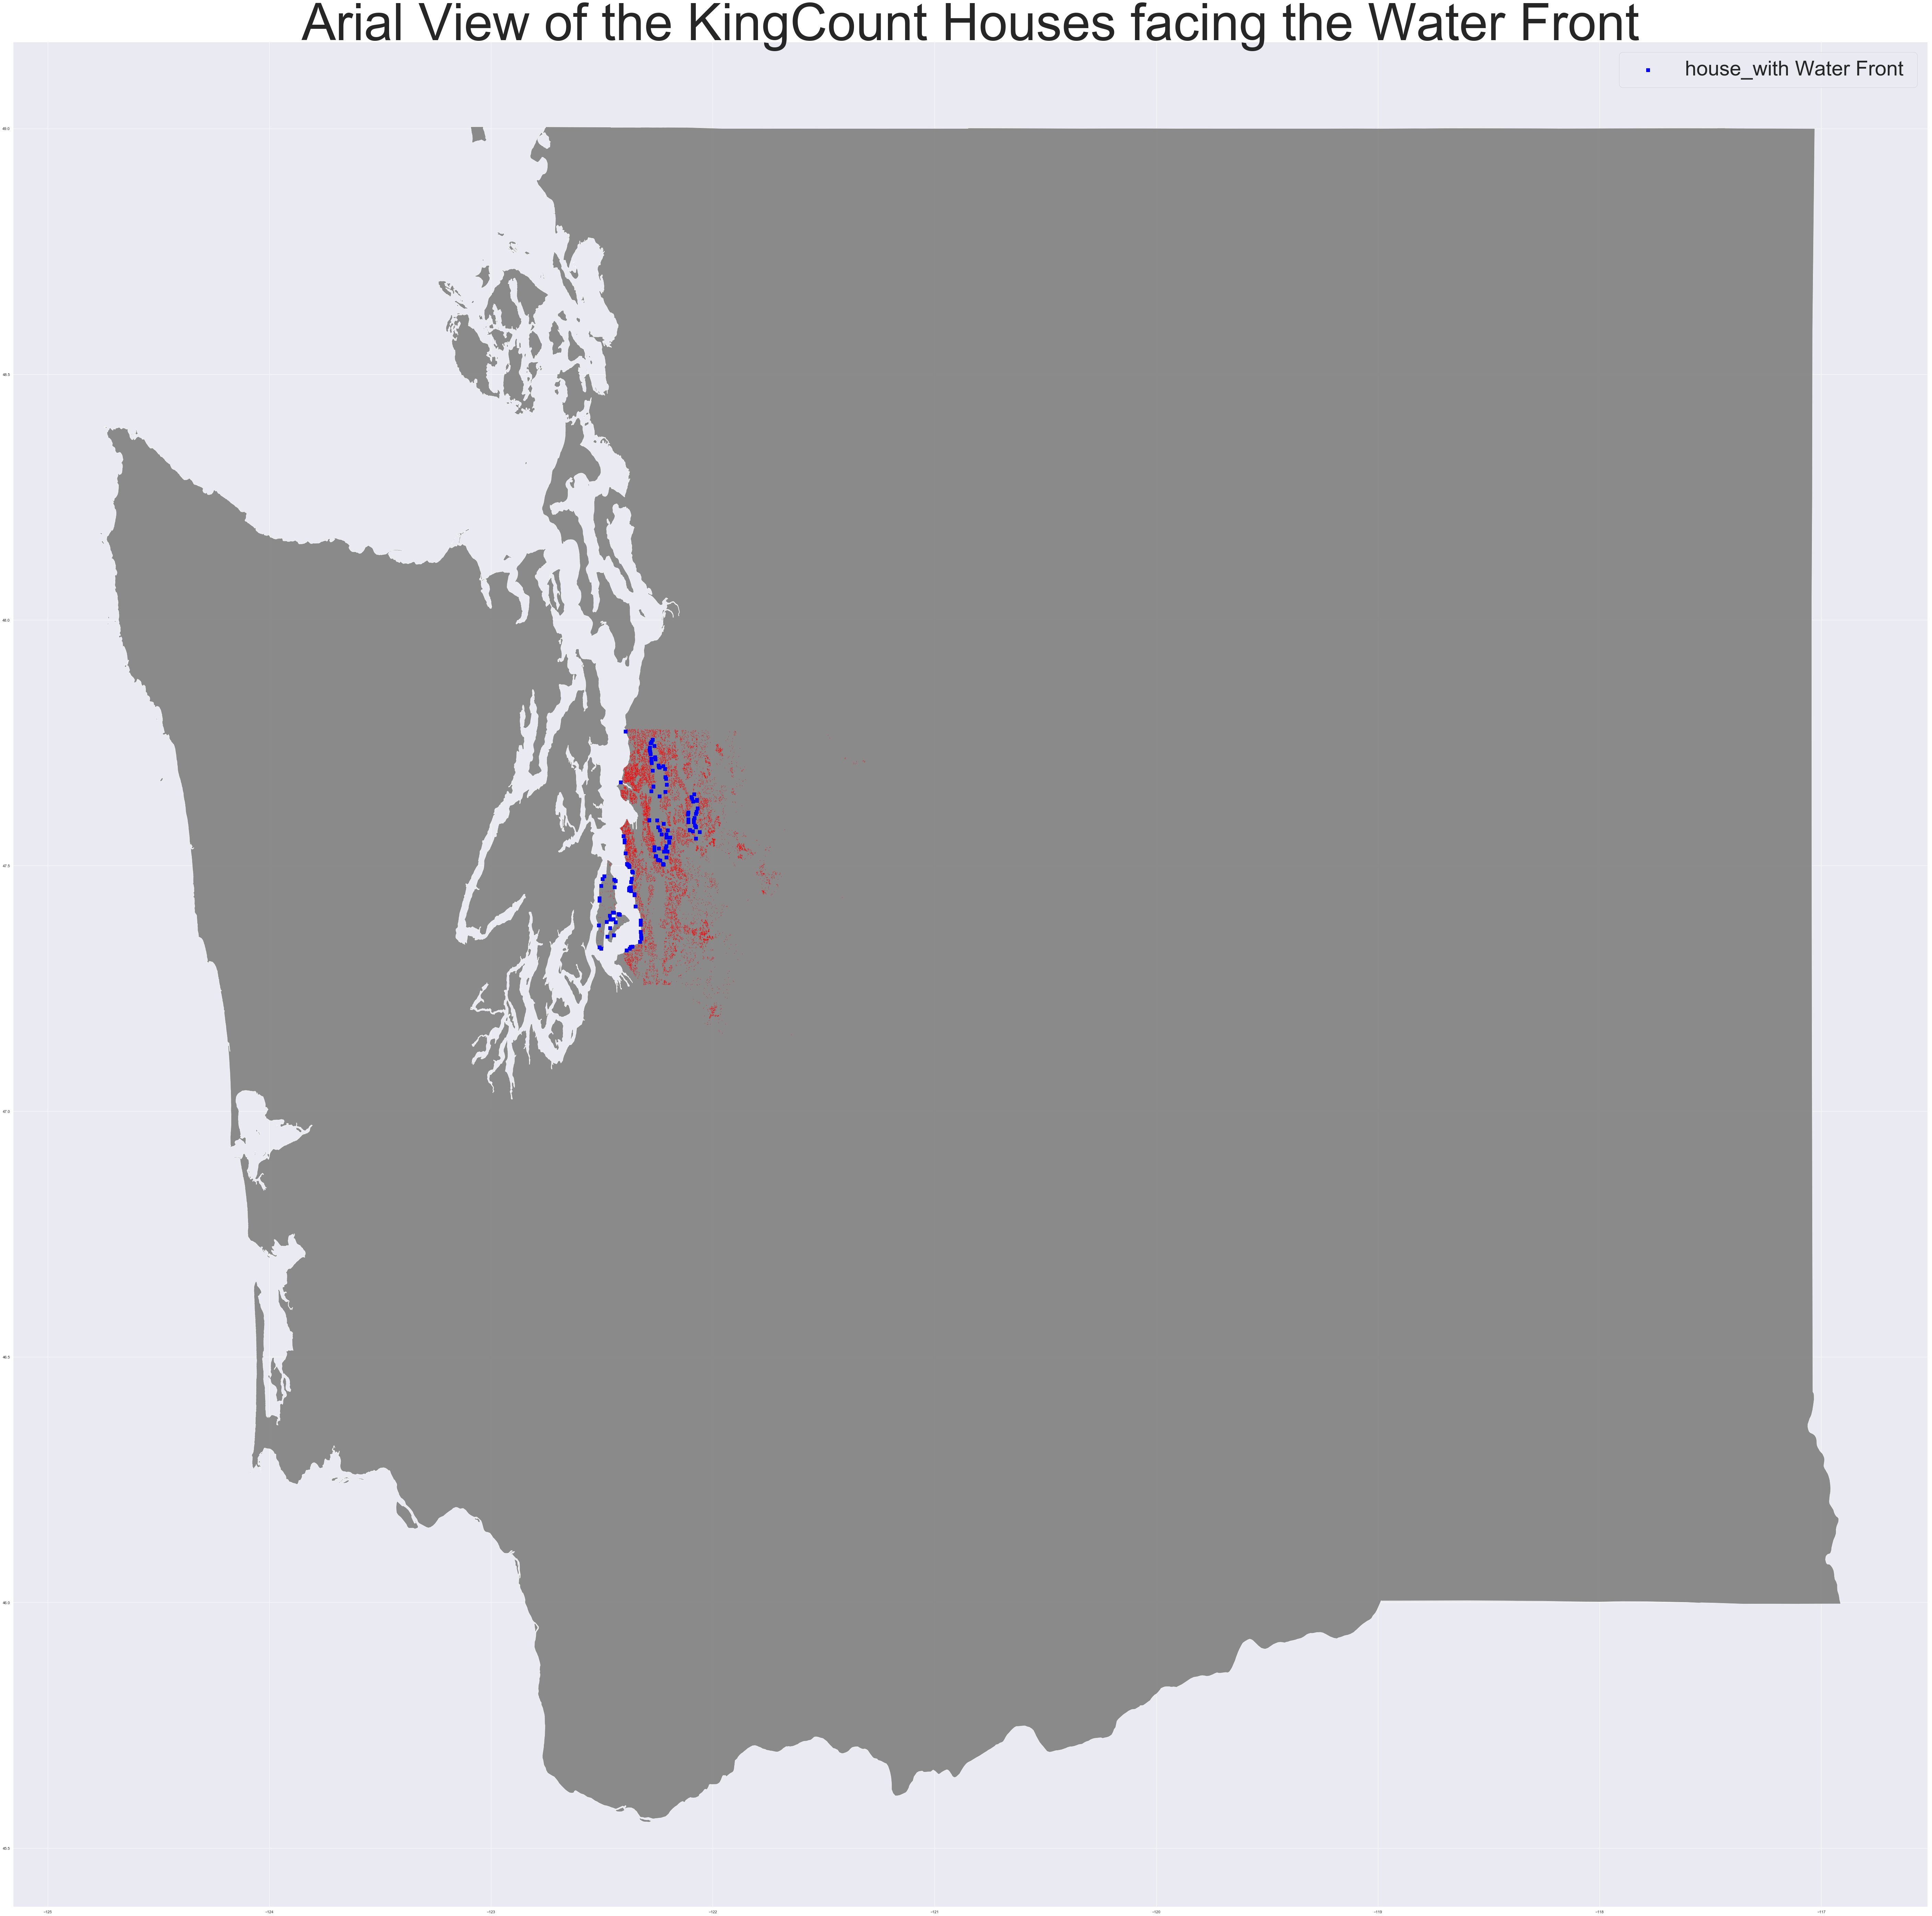

In [15]:
#Plot the houses having coast facing

fig, ax = plt.subplots(figsize = (100,100))  
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.9)
house_feature_df_Geo.geometry.plot(marker='.', color = 'red', ax = ax,alpha=.9, markersize = 1)
house_feature_df_Geo[house_feature_df_Geo['coast']==1].geometry.plot(marker="s",color = 'blue', ax = ax, label = 'house_with Water Front ', alpha=1, markersize = 100 )
plt.title('Arial View of the KingCount Houses facing the Water Front',fontsize=150)
plt.legend(fontsize=60) 

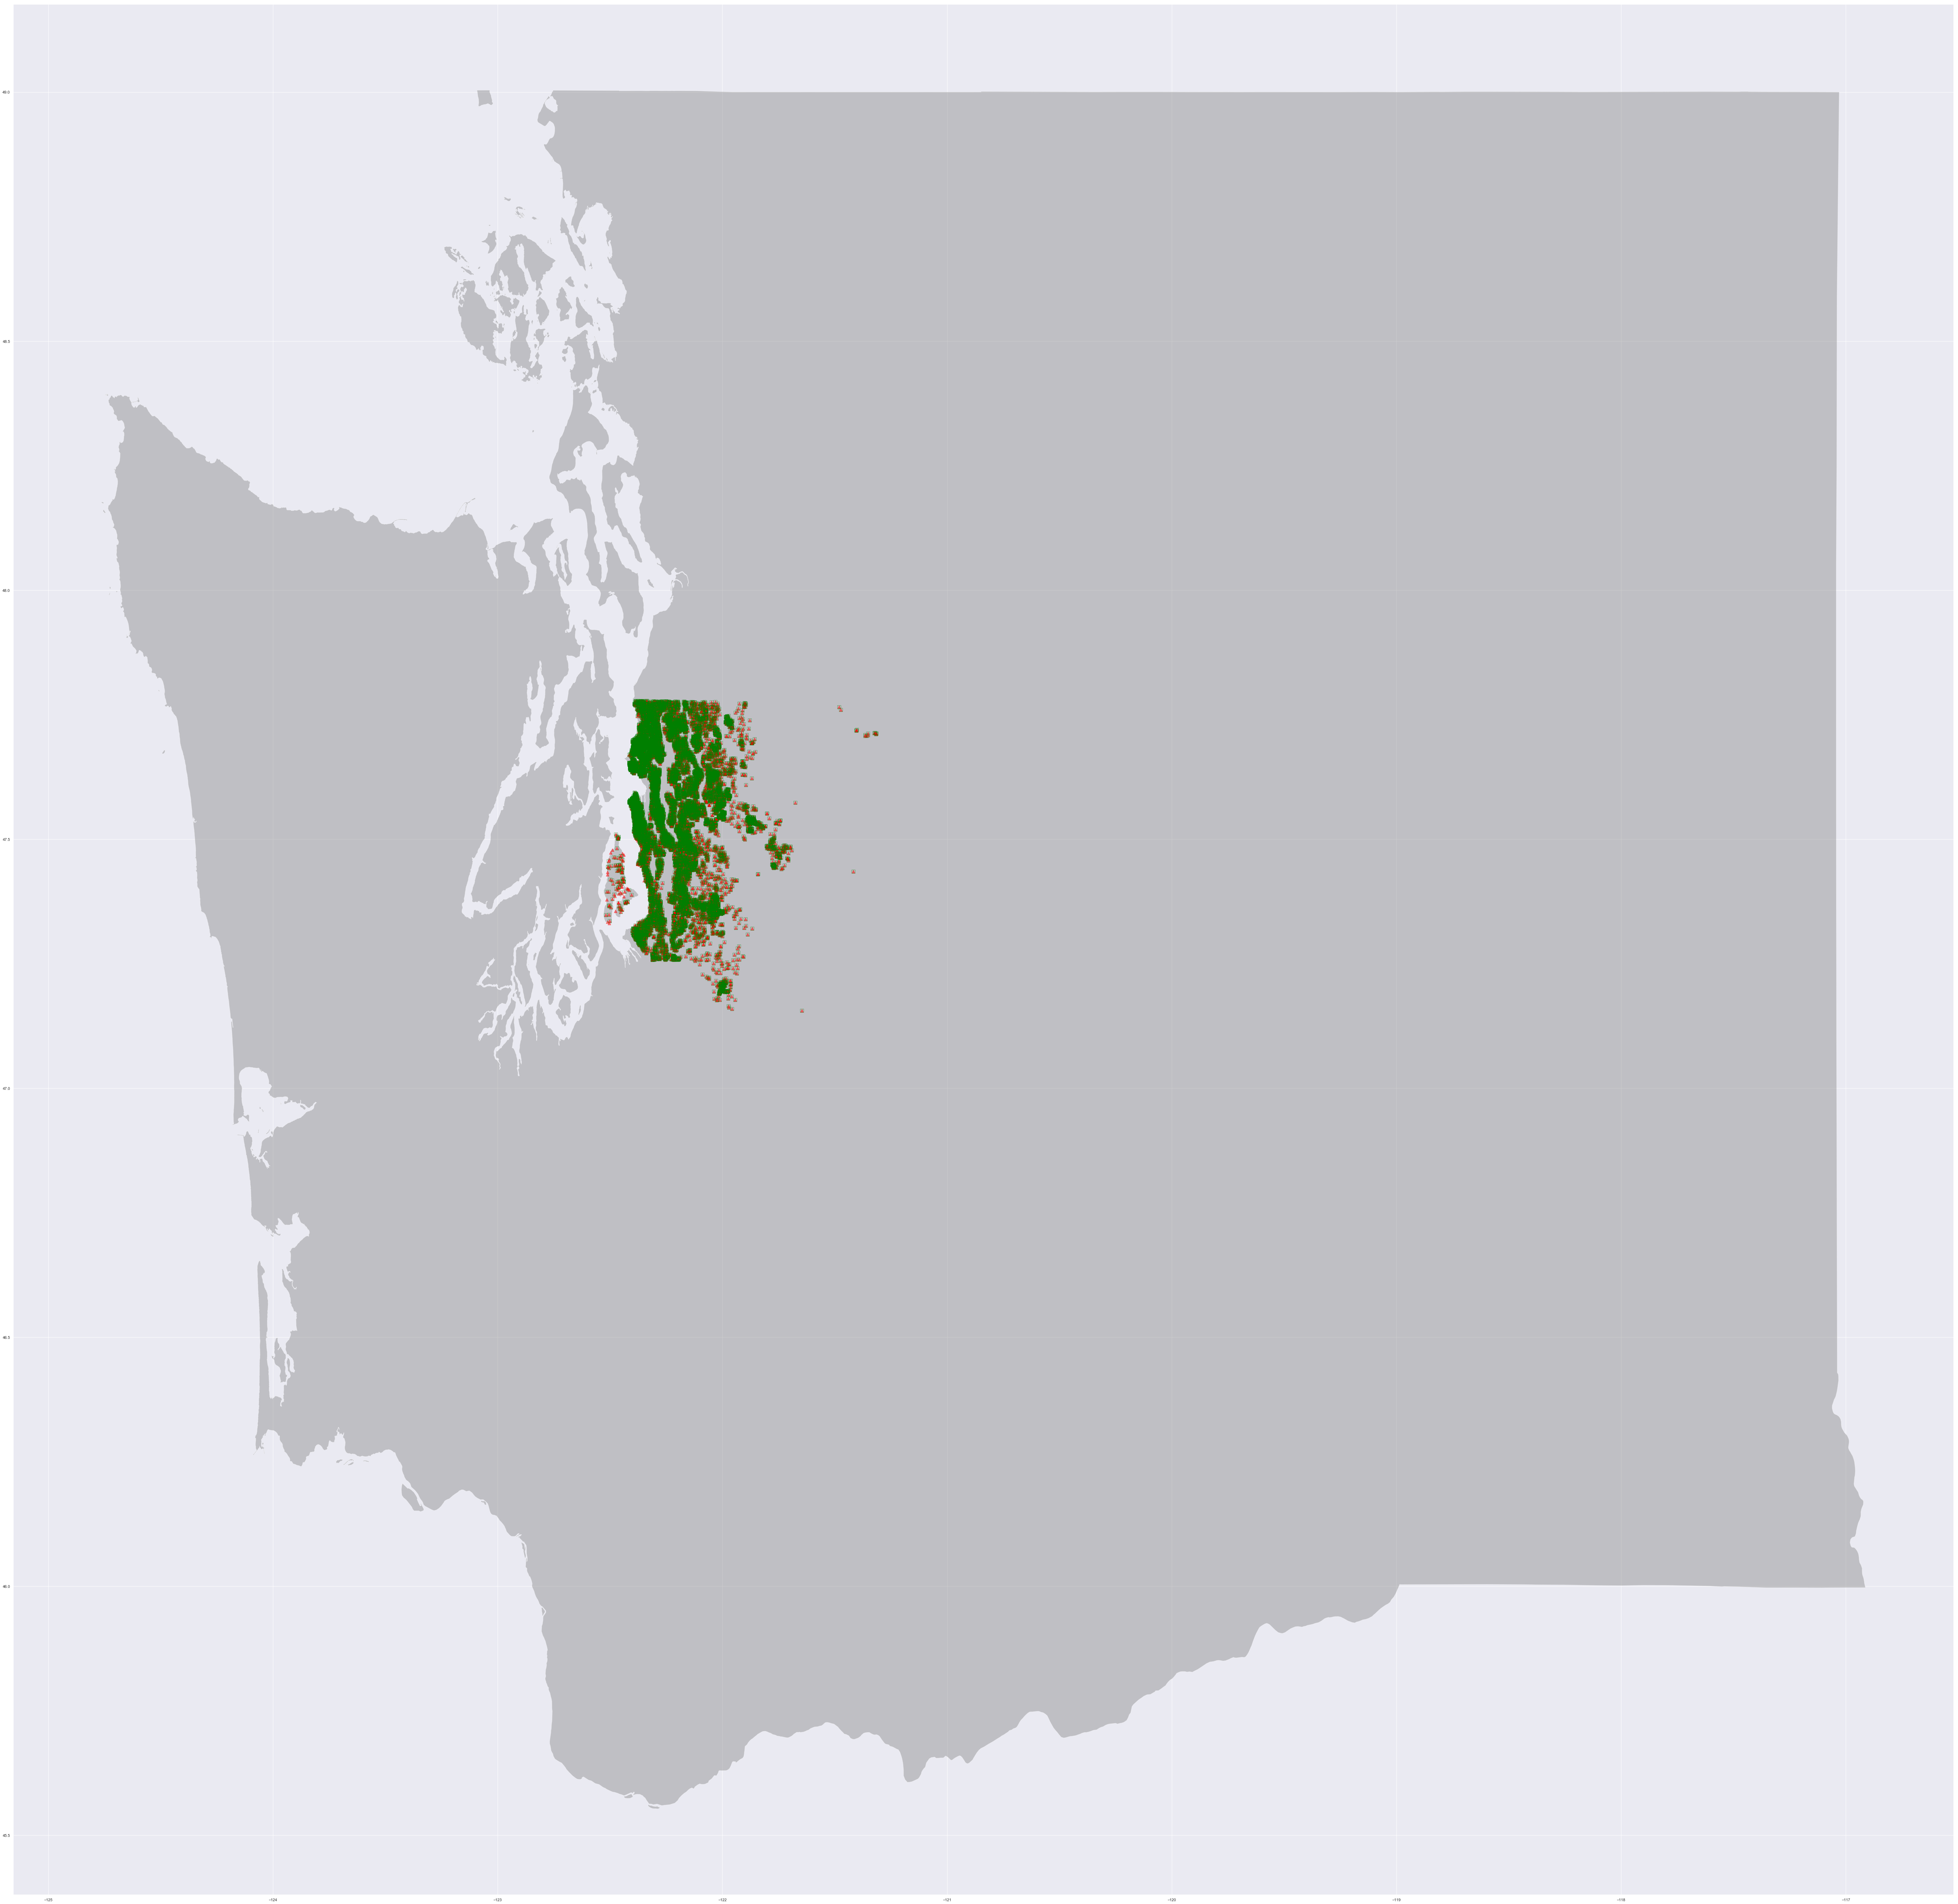

In [16]:
import pylab 
fig, ax = plt.subplots(figsize = (100,100))
KingCounty_Washington_map.plot(color='grey', ax=ax, alpha = 0.4)
house_feature_df_Geo.geometry.plot(marker='^', color = 'red', ax = ax,label = 'Geometry', alpha=.5, markersize = 75 )

#Plot the houses which dont have the coast i.e coast =0
house_feature_df_Geo[house_feature_df_Geo['coast']==0].geometry.plot(marker="s",color = 'green', ax = ax, label = 'house_withCoast',facecolors="None", alpha=.5, markersize = 100 )

##Plot the houses which  have the coast i.e coast 

In [17]:
house_feature_df  = house_feature_df.drop(['geometry'], axis=1)

In [18]:
house_feature_df['Premium_House']   = house_feature_df['Premium_House'].astype(np.int64)

In [19]:
# Write outfiles to directory
house_feature_df.to_csv('house_feature_df.csv')

# ******************** End of Geographical Analysis *****************